In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [153]:
df2=pd.read_csv("Country-Code.csv")
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [154]:
df1=pd.read_csv('zomato12.csv')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [155]:
data=pd.merge(df1,df2)

In [156]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [157]:
data.shape

(9551, 22)

# Droping Duplicates

In [158]:
data.drop_duplicates()
data.shape

(9551, 22)

-No duplicates values are present.

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Checking unique values

In [160]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

# EDA

# Checking Null Values

In [161]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [162]:
data['Cuisines']=data['Cuisines'].fillna(data['Cuisines'].mode()[0])

In [163]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

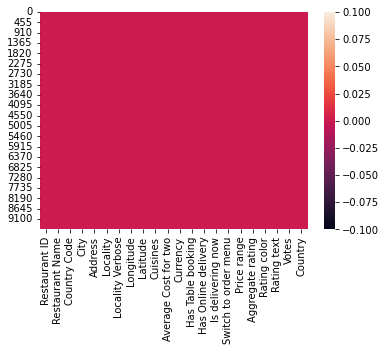

In [164]:
# visualising null values in dataset
sns.heatmap(data.isnull())

No null values present in dataset.

# Univariate Analysis

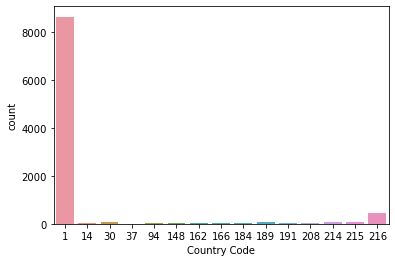

In [165]:
sns.countplot(x='Country Code',data=data)
plt.show()

Whose are having 1 as country code they are having more count.

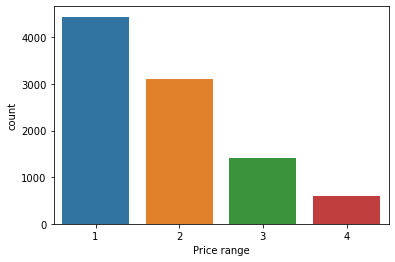

In [166]:
sns.countplot(x='Price range',data=data)
plt.show()



    We can see, Price range of 1 has maximum price range followed by 2.
    All Price range are decreasing in order.



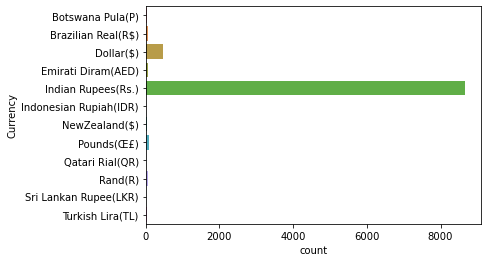

In [167]:
sns.countplot(y='Currency',data=data)
plt.show()



    We can see, Indian Rupees is most used currecny. It means that zomato has main business in India followed by Dollar.
    Remaining all has no such used, it means zomato not functioning in that country as zomato does in India.



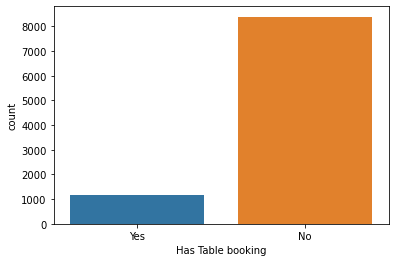

In [168]:
sns.countplot(x='Has Table booking',data=data)
plt.show()

Observation:We can see, Zomato has not provivded the table booking. But in some place it provided table booking. May be their zomaato own its Restaurant.

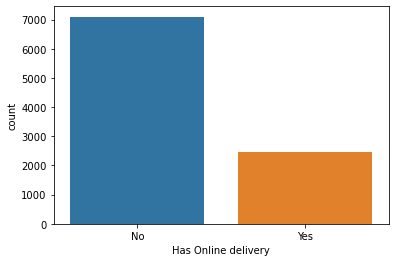

In [169]:
sns.countplot(x='Has Online delivery',data=data)
plt.show()

Observation: 

    Most of places has no online delivery available.
    But in few places has availabled online delivery.



In [170]:
## Which countries do have online deliveries option
a=data[data['Has Online delivery']=='Yes'].Country.value_counts()

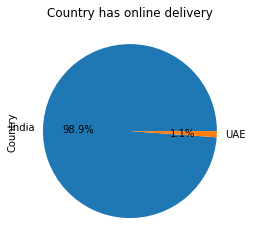

In [171]:
a.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()

Observation: 

    we can see, India has 98.9% online delivery available but UAE has only 1.1% online delivery.
    But rest of all countries haven't online deliovery.



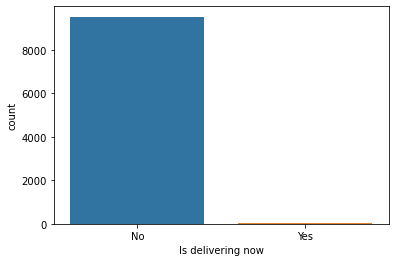

In [172]:
sns.countplot(x='Is delivering now',data=data)
plt.show()

Most of the places has not availavel delivery Now system.

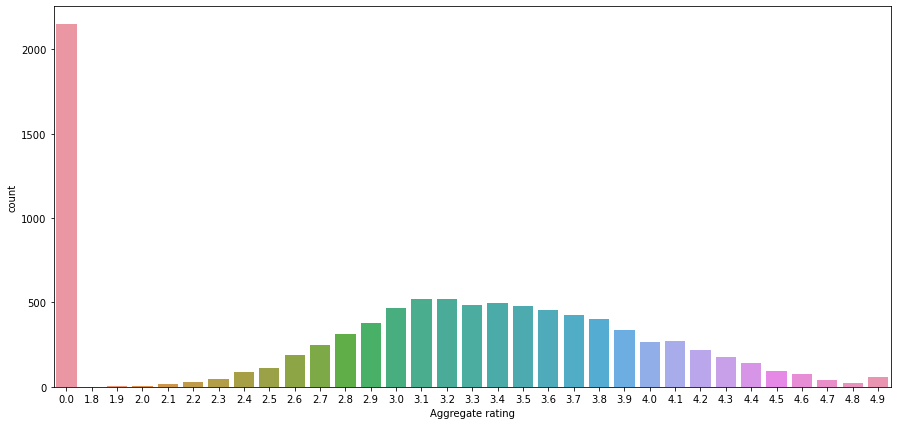

In [173]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=data)
plt.show()



    Most of the coustomer has gives 0 aggregate rating than others.
    3.1 and 3.2 is most given rating after a 0 aggregate rating.



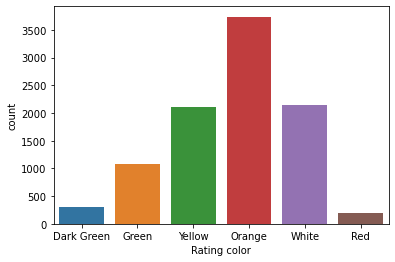

In [174]:
sns.countplot(x='Rating color',data=data,)
plt.show()



    We can see, orange is most used color for rating followed by white.
    Red color are less used for rating. It means no one dislike the food delivered by zomato.



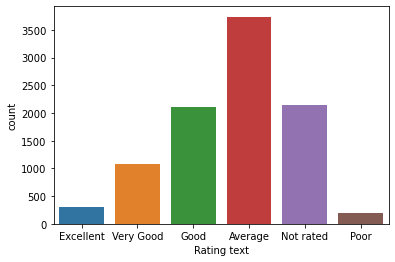

In [175]:
sns.countplot(x='Rating text',data=data,)
plt.show()



    In rating text, Average is the most used test followed by good.
    But some of customer are not rated the zomato service.
    Very few customers gives poor rating.



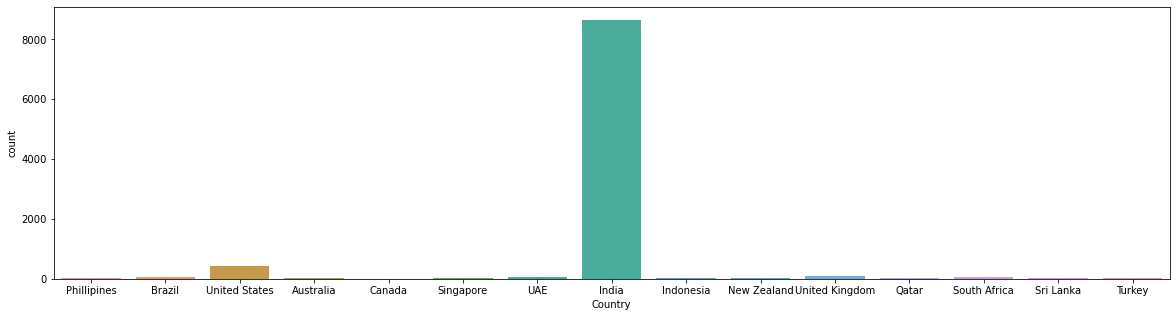

In [176]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=data)
plt.show()



    As we observed before that Indian currency is most used. It because of in India is the most of Zomato businees do followed by USA.
    Rest of all counteries zomato not gives service as in India they gives.



In [177]:
city_values = data.City.value_counts().values
city_labels = data.City.value_counts().index

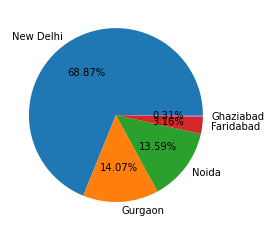

In [178]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

Observation: 

    68.7% zomato works in New Delhi followed by Gurgaon.
    In this we can observed here these cities are comes in Delhi NCR Region. It means that zomato mostly works in Delhi NCR region.



In [179]:
# Find top 10 Cuisine
cuisin_val=data.Cuisines.value_counts().values
cuisin_label = data.Cuisines.value_counts().index

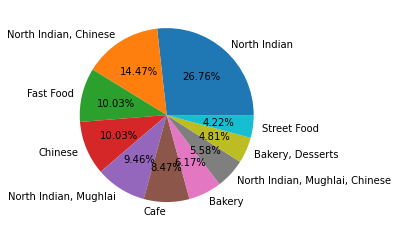

In [180]:
plt.pie(cuisin_val[:10],labels=cuisin_label[:10],autopct='%1.2f%%')
plt.show()



    We can see, 26.58% people or customers like to eat north Indian cuisine followed by Chinese.
    These are the top 10 Cuisine like by customes.



In [181]:
# Find top 10 location
val=data.Locality.value_counts().values
label = data.Locality.value_counts().index

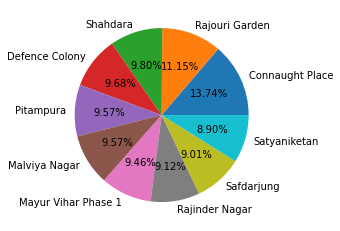

In [182]:
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()





    These are the top 10 place where most of zomato allines restaurant are located.
    In which Connaught Place is top among the others it has 13.74% restaurant in it place followed by Rajouri Graden.



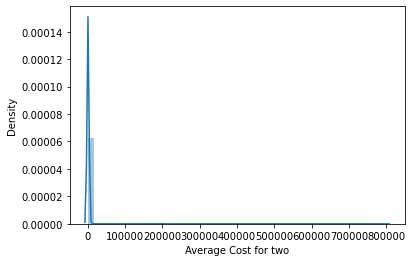

In [183]:
sns.distplot(data['Average Cost for two'])
plt.show()



We can see 50% restaurand are affortable.

# Bivariate Analysis

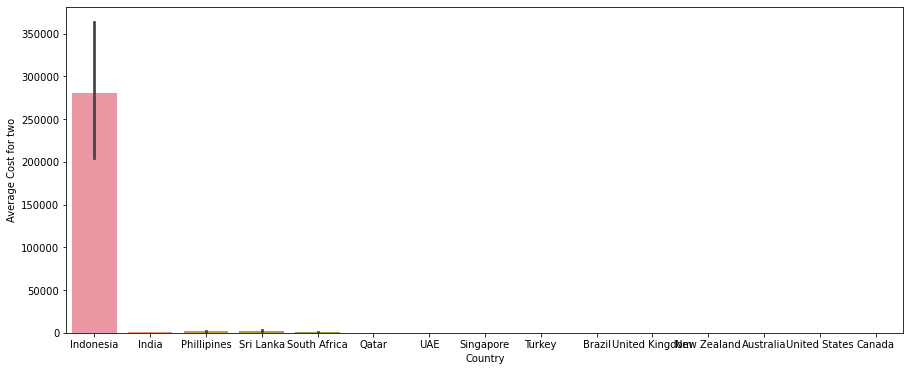

In [184]:
plt.figure(figsize=(15,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Country",y="Average Cost for two",data=df_good)
plt.show()



    We can see, Indonesia has high Average cost for two. It means that Indonesia has high cost of foods than others.
    Rest of all having low average cost for two.



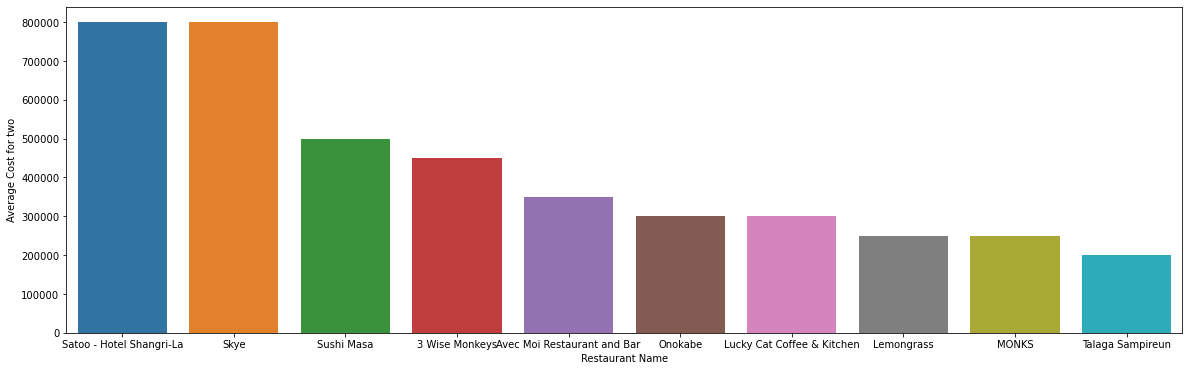

In [185]:
plt.figure(figsize=(20,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=df_good)
plt.show()



    These are the top 10 restaurant name where average cost for two is low than others.
    In which Satoo hotel has high average cost for two followed by Skye.



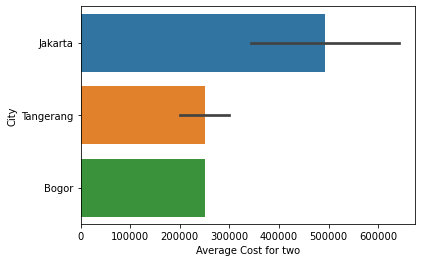

In [186]:
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(y="City",x="Average Cost for two",data=df_good)
plt.show()

These are top cities where has high average cost for two in which Jakartha is in to followed bt Tangerang.

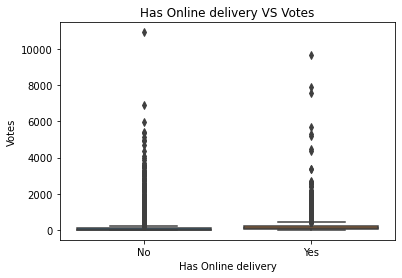

In [187]:
sns.boxplot(x='Has Online delivery',y='Votes',data=data)
plt.title('Has Online delivery VS Votes')
plt.show()

Observation: 

    Yes,you can observe that median number of votes for both categories vary.
    Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.



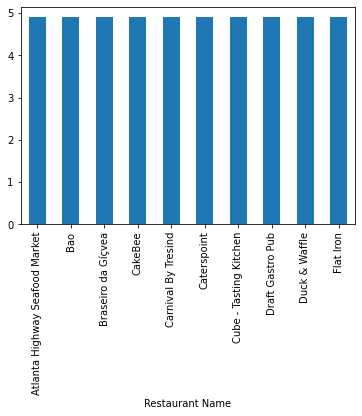

In [188]:
data.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

Observation: 

    These are the top 10 restaurant name where most of the coustomers gives good aggregate rating.
    In which Atlanta is top among the others.



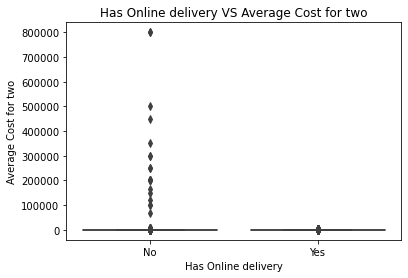

In [189]:
sns.boxplot(x='Has Online delivery',y='Average Cost for two',data=data)
plt.title('Has Online delivery VS Average Cost for two')
plt.show()

Average cost for two has not affected by online delivery system.

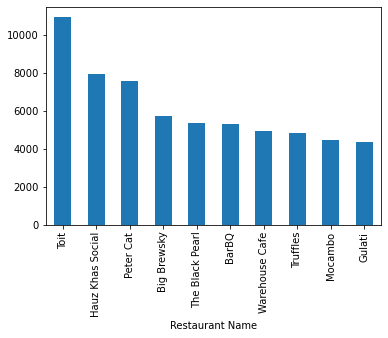

In [190]:
data.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()



Observation: 

    We can see, top 10 reaturant on basis of the customers votes.
    Toit is top restaurant top among the others whose have top votes followed by Hauz Khans.



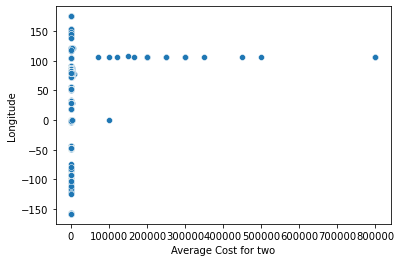

In [191]:
sns.scatterplot(x='Average Cost for two',y='Longitude',data=data)
plt.show()



    It does not have any linear correlation of both features.
    Most of the restaurant are above the 50 Longitute.



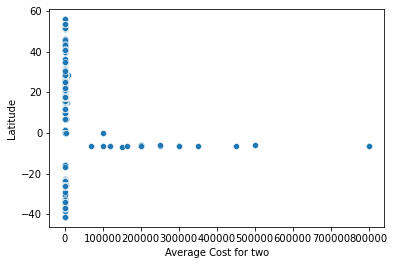

In [192]:
sns.scatterplot(x='Average Cost for two',y='Latitude',data=data)
plt.show()

Observation: We can see, both feature is not have nay linear relationship with each others.

In [193]:
rating=data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

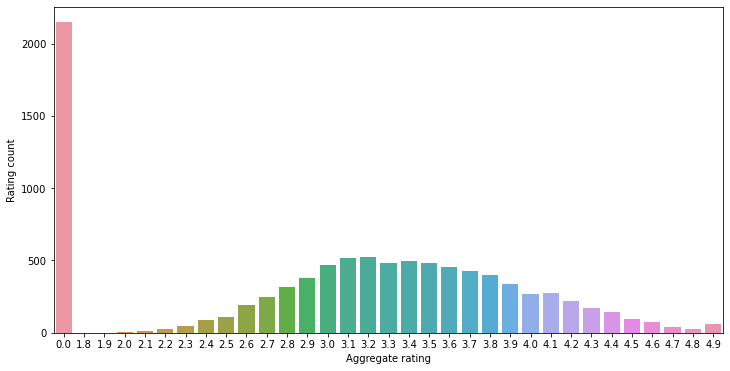

In [194]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)
plt.show()



Observation: 

    When rating is between 4.5 to 4.9-----> Excellent
    When rating is between 4.0 to 3.4-----> Very good
    When rating is between 3.5 to 3.9-----> Good
    When rating is between 2.5 to 2.9-----> Average
    When rating is between 2.0 to 2.4-----> Poor
    And 0 rating given by many people



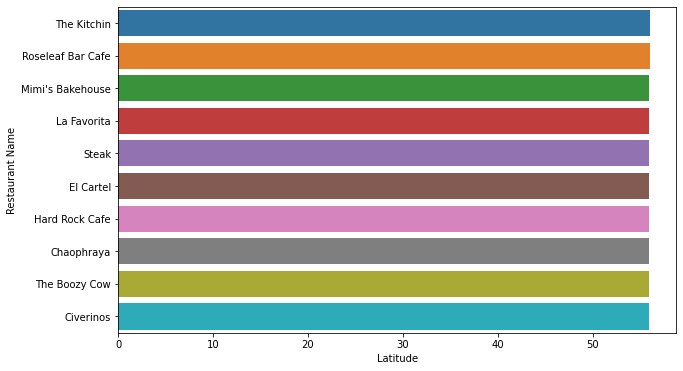

In [195]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="Latitude",ascending=False).iloc[0:10,:]
sns.barplot(y="Restaurant Name",x="Latitude",data=df_good)
plt.show()



    We can see, by latitude The Kitchen has highest latitude. It mean at high latitude criteria, it is top.
    We can see, all top 10 restaurant name, where they are generaly lies in nearly same latitude.



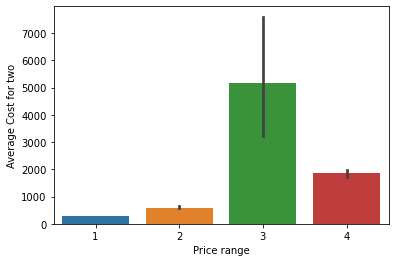

In [196]:
sns.barplot(x='Price range',y='Average Cost for two',data=data)
plt.show()



Observation: 

    Many restaurant are having as price range 3 it means that those are also having high average price range.
    it may have directly proportional to each others.



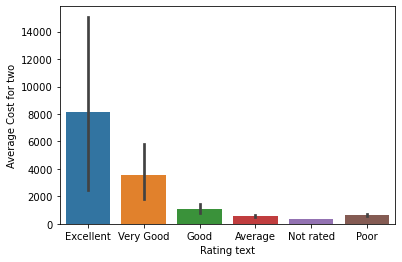

In [197]:
sns.barplot(x='Rating text',y='Average Cost for two',data=data)
plt.show()

Whose having as rating text Excellent those restaurant are having high average cost for two.
According to rating test average coat for to is depend

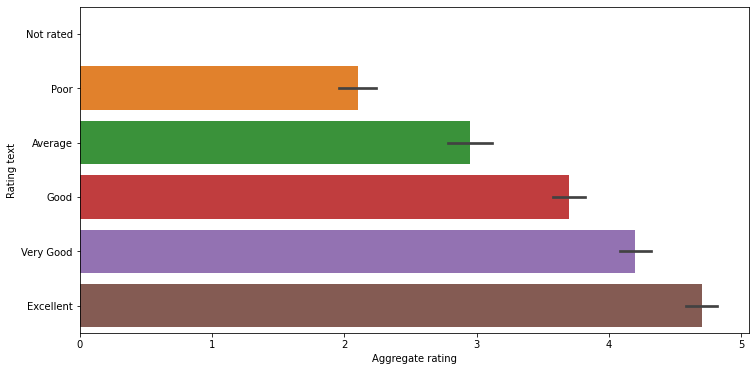

In [198]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating text',data=rating)
plt.show()



    We can see, Many restaurant are having Excellent as rating text and their Aggrege=ate rating also high it mean more than 4.5.
    Similarly, Rating text is depending upon the aggregate rating. Whose are having good rating thier rating text also good.



In [199]:
# Find the countrries name that has given 0 rating
data[data['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3




    We can see, most of the Indian customers are gives the 0 rating.
    It means that may be service is bad or customers are not intresting in gives any rating.



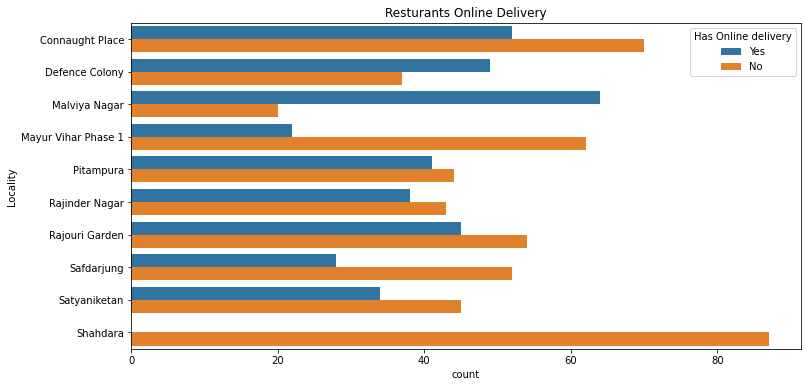

In [200]:
Delhi = data[(data.City == 'New Delhi')]
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')
plt.show()

Observation: 

    We can see, most of the place has no online delivery option. or online order system.
    But Malviya Nagar is top among the restaurant whose having online ordered or online delivery.



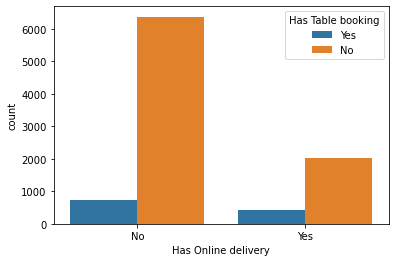

In [201]:
sns.countplot(x='Has Online delivery',hue='Has Table booking',data=data)
plt.show()

Observation: We can see, those are not providing online delivery they also have less table booking but it doe not have any impact on business because most of the restaurant has not provided online delivery.

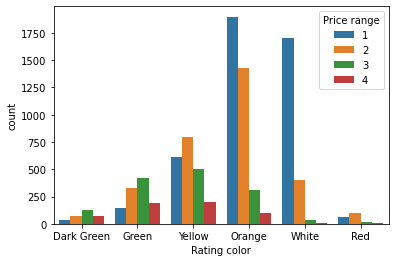

In [202]:
sns.countplot(x='Rating color',hue='Price range',data=data)
plt.show()



Observation: We can see, As per price range the rating color has change. In Which the Orange rating color has more count than others.

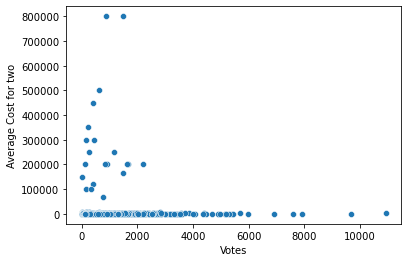

In [203]:
sns.scatterplot(x='Votes',y='Average Cost for two',data=data)
plt.show()



    Votes has no linear relationship with Average cost for two.
    But upto 2000 Votes Average cost has some linear relationship with votes.



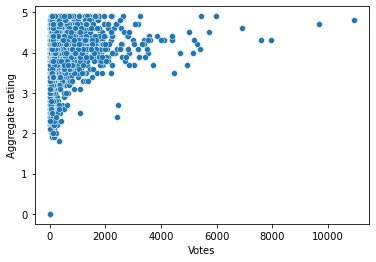

In [204]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=data)
plt.show()



Observation: 

    There is no direct linear relationship with each others.
    But After 2 rating there is little linear relationship.



# Multivariate Analysis

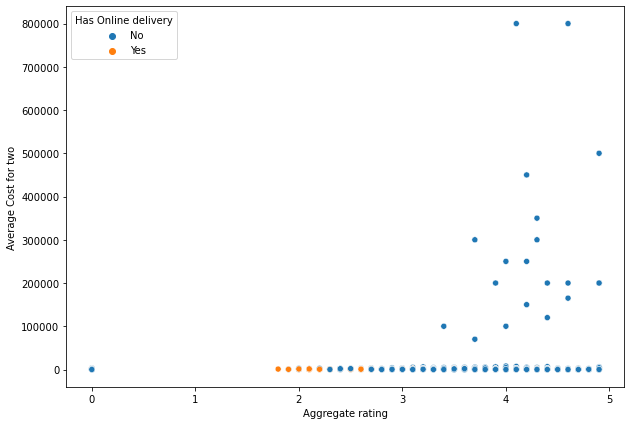

In [205]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Aggregate rating',y='Average Cost for two',hue='Has Online delivery',data=data)
plt.show()



    We can see, very few restaurant has accepted the online delivery it mean online oders.
    here those restaurant not accepted online odered they also have good rating.



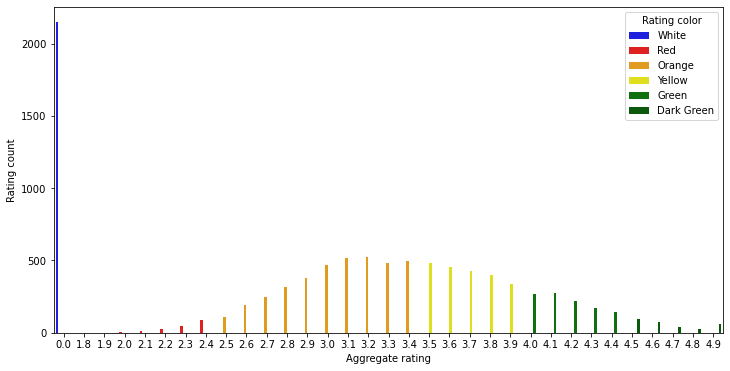

In [206]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color',data=rating, palette=['blue','red','orange','yellow','green','darkgreen'])
plt.show()

Observation: 

    Not Rated count is very high.
    Maximum number of rating are between 2.5 to 3.4.



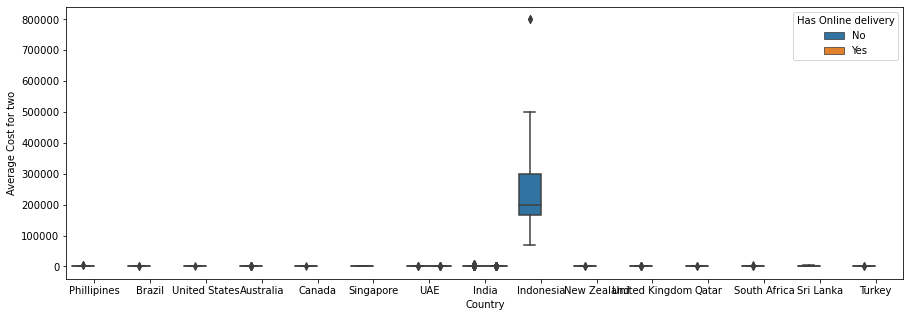

In [207]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Country", y="Average Cost for two", hue="Has Online delivery",data=data)
plt.show()



    we can see, Indonesia has high average cost for two and they also not available of online delivery. I means they are not having online oder system.
    rest of all are having low average cost foe two and they may not have any online system or may have online delivery.



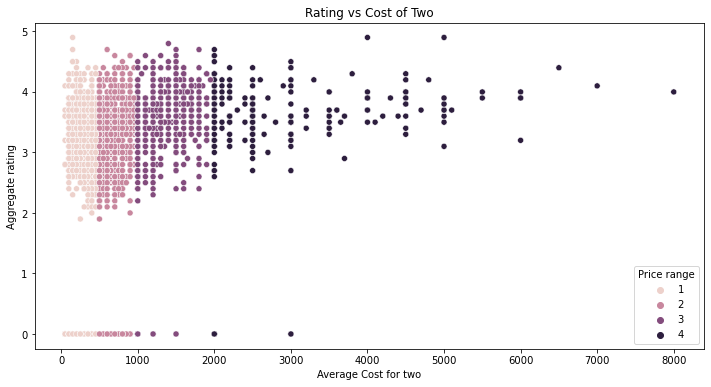

In [208]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two')
plt.show()

Observation: I observe there is no linear relation between price and rating. For instance, Restaurants with good rating (like 4Ã¢Â€Â“5) have restaurants with all the price range and spread across the entire X axis

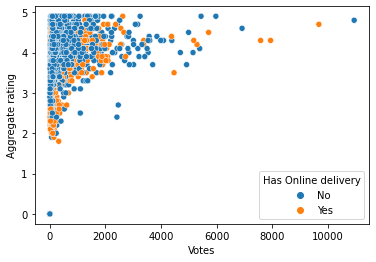

In [209]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=data,hue='Has Online delivery')
plt.show()

Observation:

    We can see, many restaurant are having more than 4 rating and they also have online delivery.
    But many restaurant are dont have online delivery and they have good rating.



# Encoding of DataFrame

In [210]:
data.drop(columns=['Restaurant ID','Locality Verbose'],axis=1,inplace=True)

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
le=LabelEncoder()

In [213]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

In [214]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


# Describe the Dataset

In [215]:
data.describe()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,64.126574,25.854381,989.461732,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,41.467058,11.007935,514.176108,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,77.081343,28.478713,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,77.191964,28.570469,1127.000000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,77.282006,28.642758,1353.500000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,174.832089,55.976980,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000



Outcome of describe of datasets:

    Difference between 75% and max in Average Cost for two, Evaporation and Votes is high, columns is considerable indicating presence of outliers.
    In some features Mean to Standrad of deviation difference is close.
    In Average cost for two has mean and std difference is more.



# Correlation of the features with target column

In [216]:
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005831
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

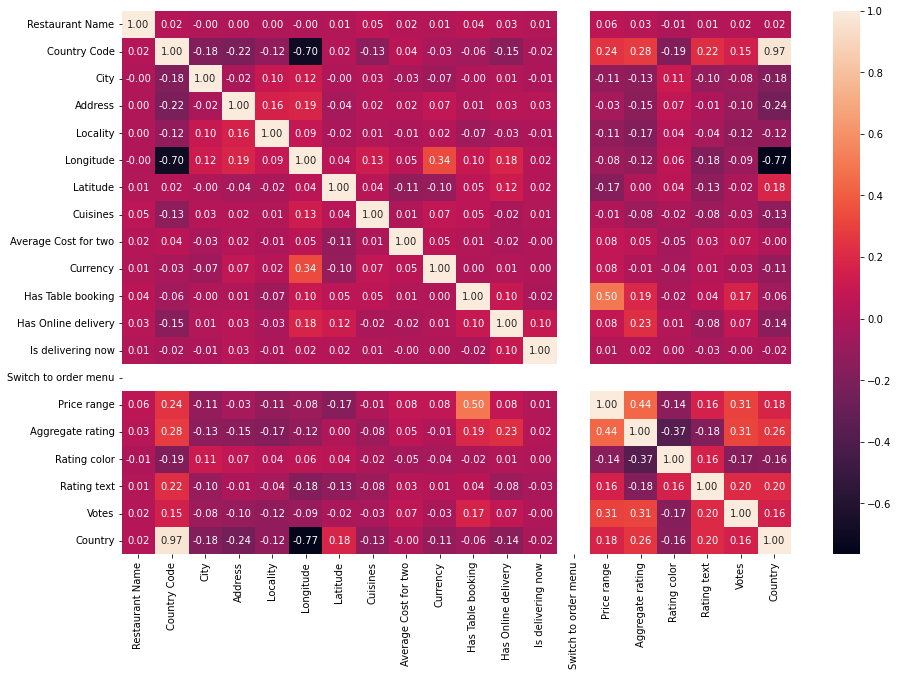

In [217]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

# Outcome of Correlation


    Price range has 8% positive correlation with target column.
    Votes has 7% positive correlation with target column.


# Features correlation to each other


    Country code has 97% positive correlation with country.
    Longitude has 77% negative correlation with country.
    Has Table Booking has 50% positive correlation with Price range.
    Price range has 44% positive correlation with Aggregate rating.
    Country code has 77% positive correlation with Longitude.


# Visualizing correlation of feature columns with label column

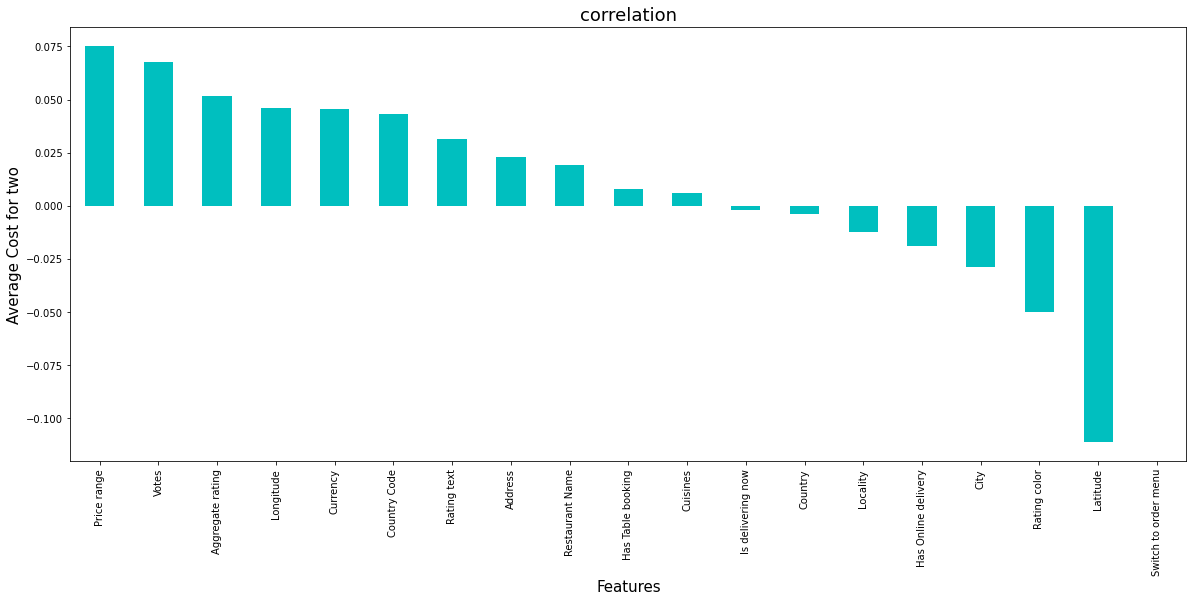

In [218]:
plt.figure(figsize = (20,8))
data.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()



    It is observed that Price range, Votes and Aggregate rating have the highest positive correlation with Average cost for two.
    Switch to oder menu, Longitude and rating color have the highest negative correlation with Average cost for two.



# Checking Distribution of data

In [219]:
data.shape

(9551, 20)

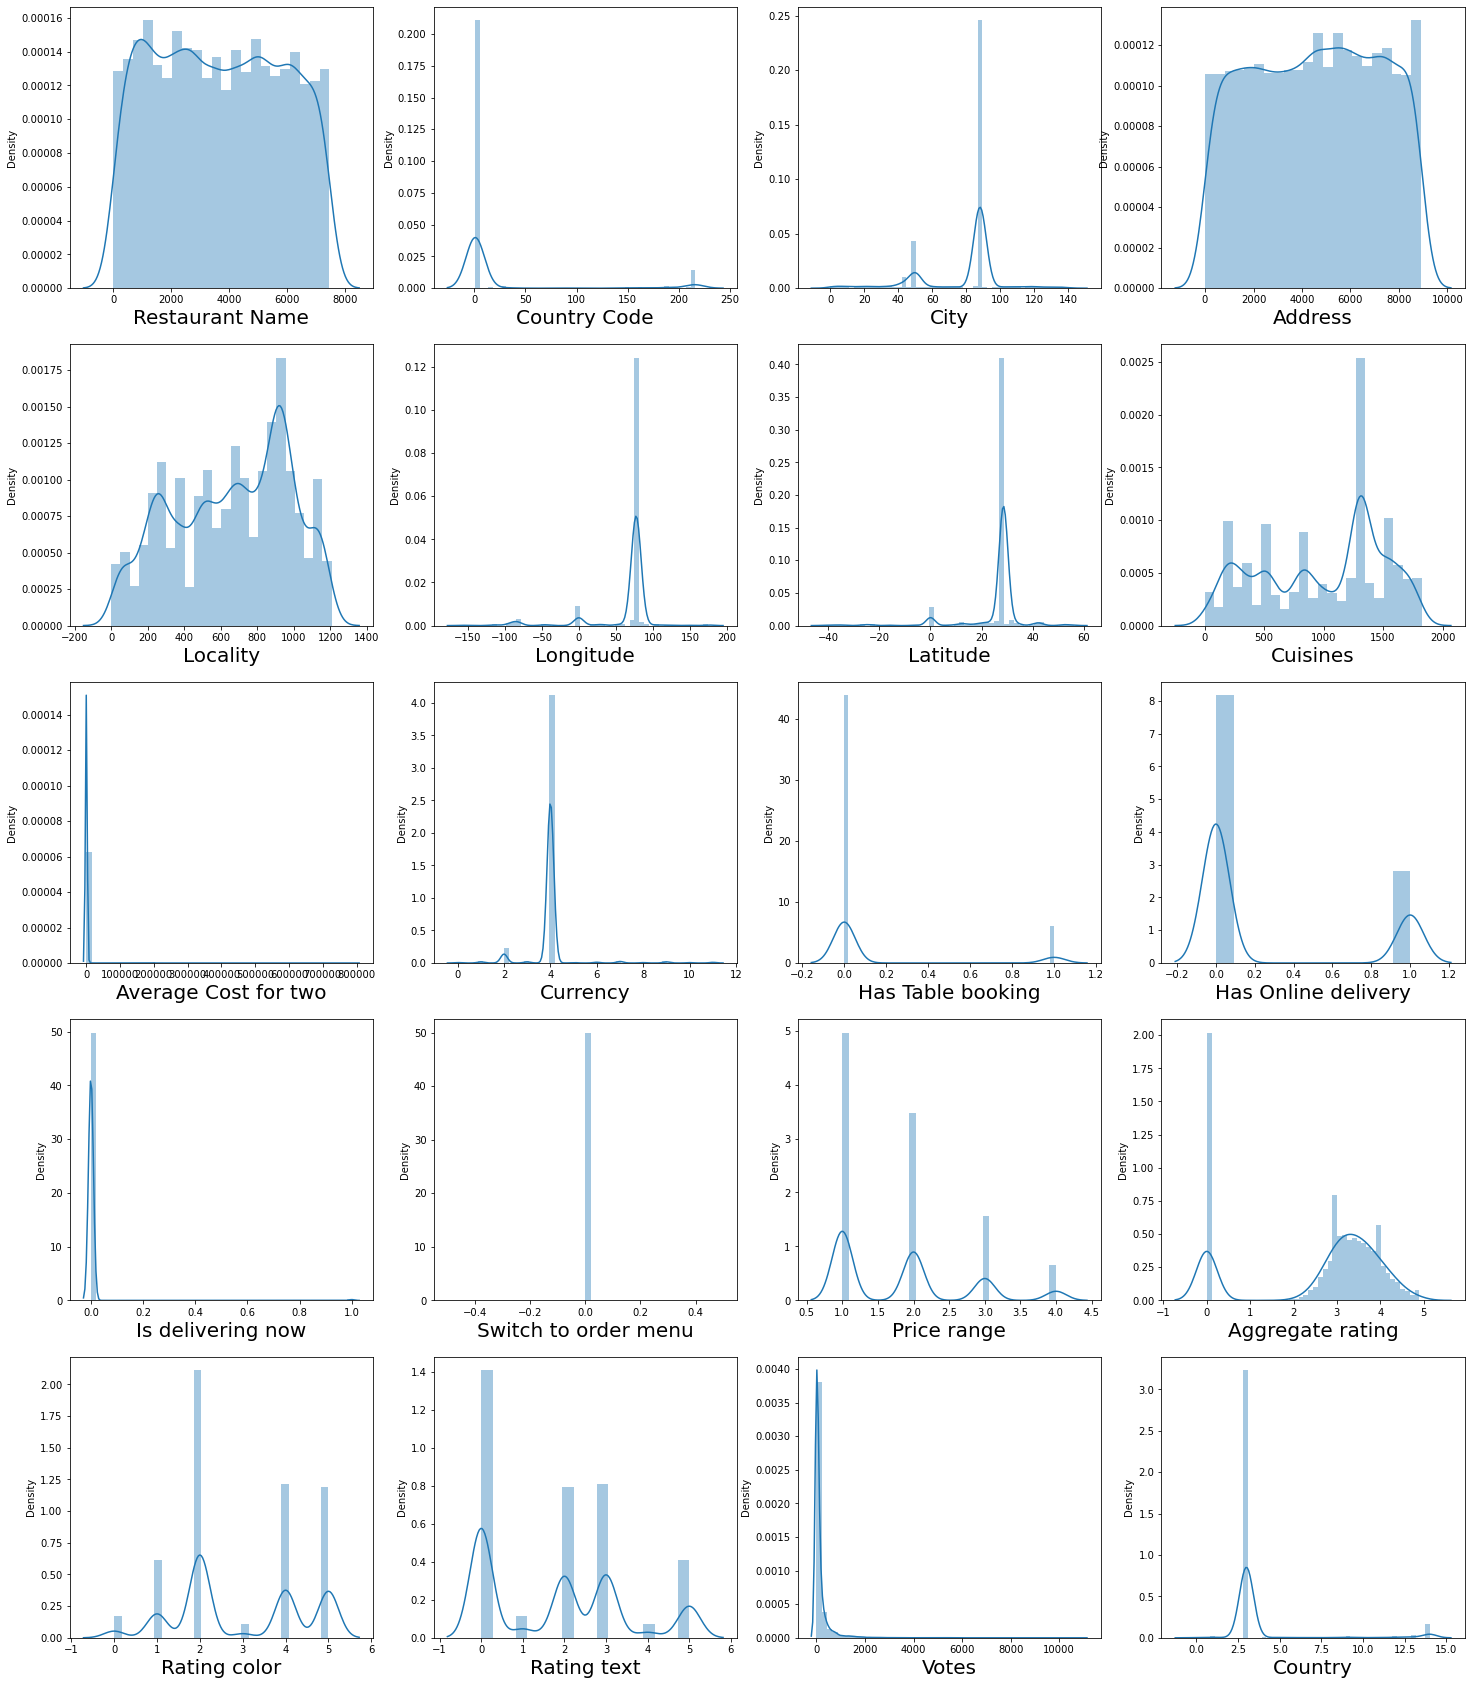

In [220]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()



Observation: 

    All features are having some skewness.
    Average cost for two and votes are seem to be present a outliers.



In [221]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

Observation: 

    Outcome of the skewness: Skewness threshold is taken is +/-0.65.
    Almost all features are having some skewness.



# Checking Outliers

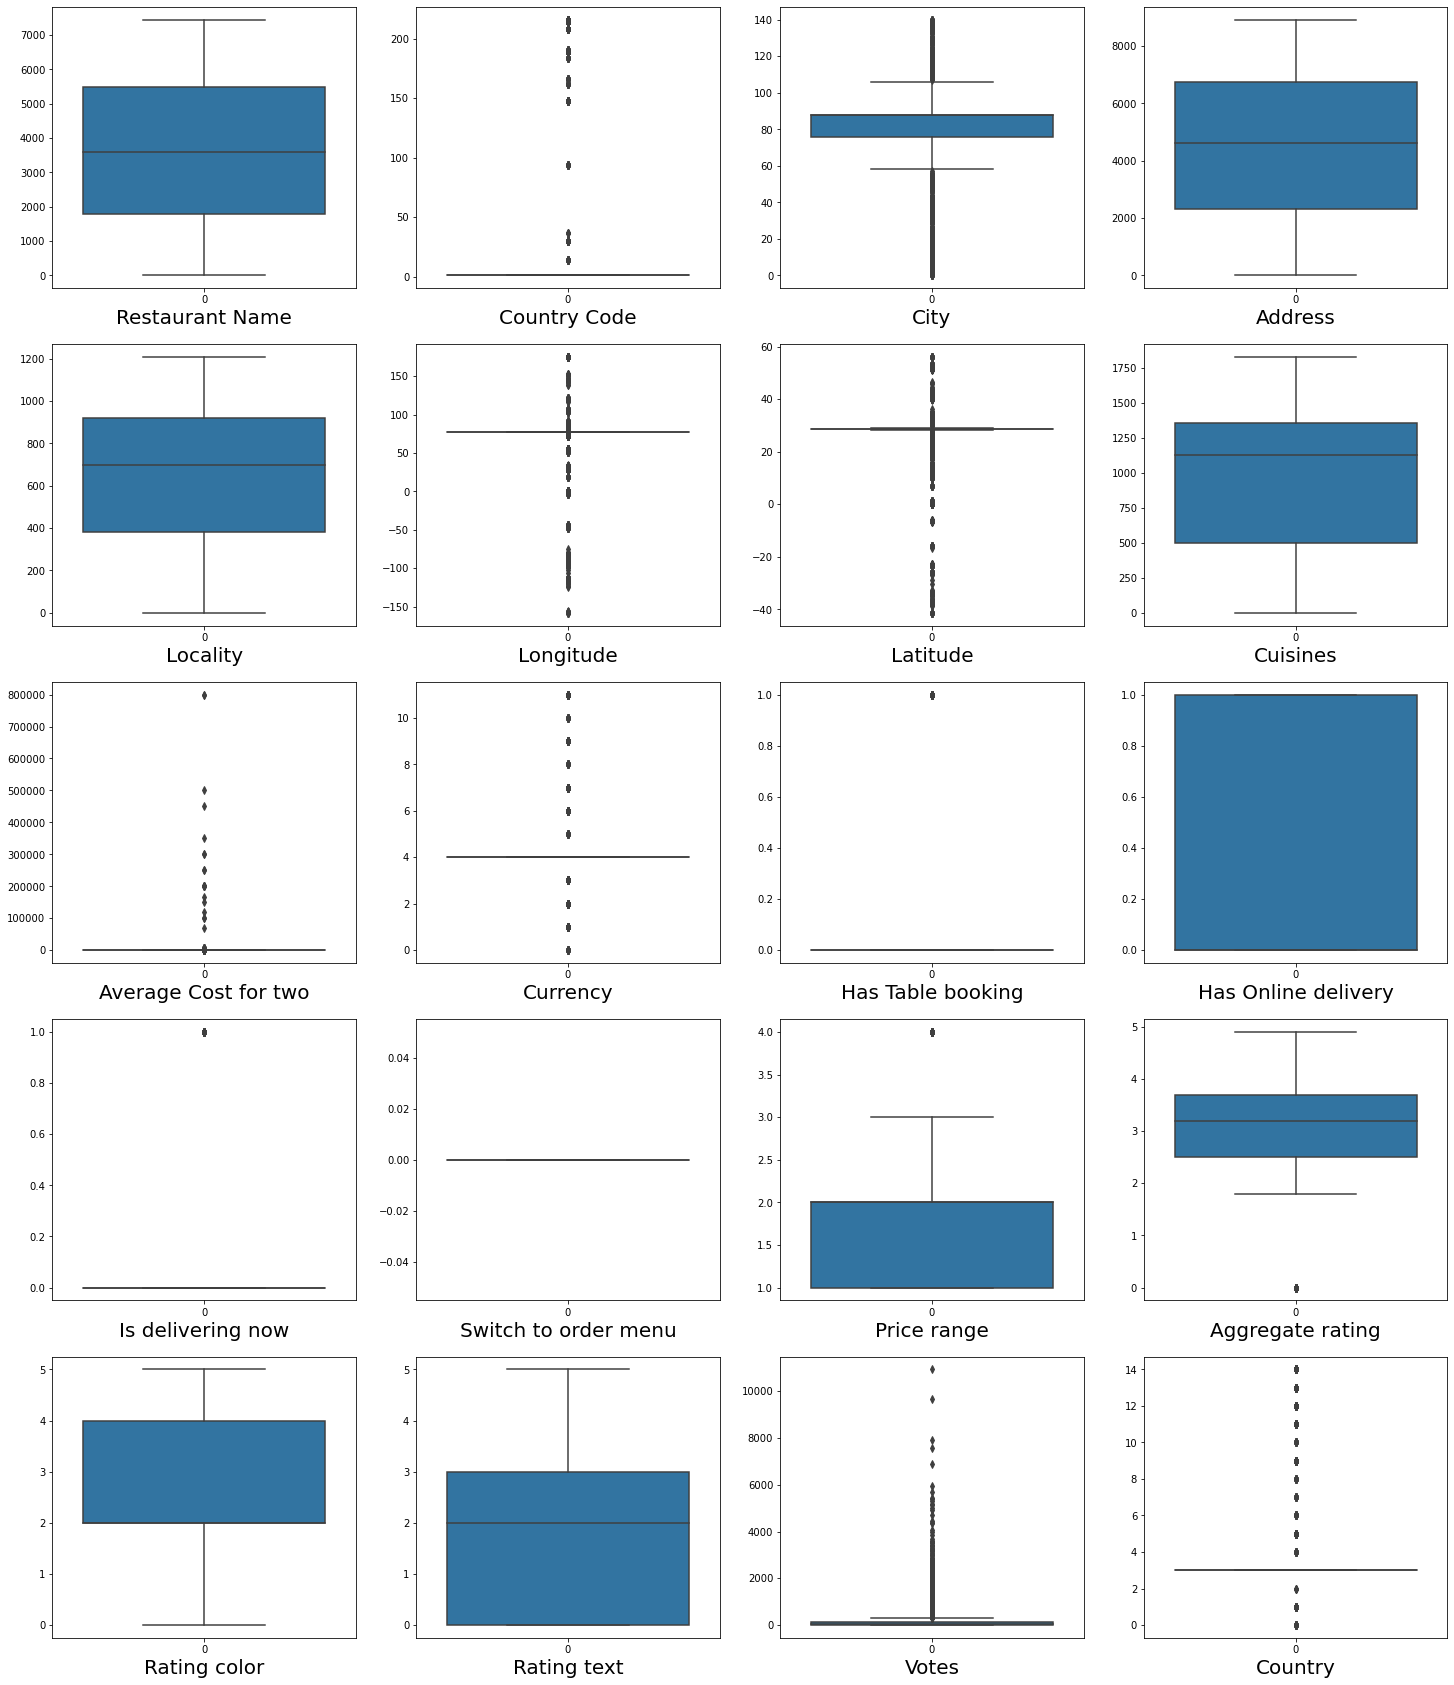

In [222]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

Observation: 

    Restaurant Name, Address, Rating color, Rating text, Has online delivery, Cuisine and Locality are not having Outliers.
    Some feature are having outliers but those are categorical features.



# Removing Outliers

In [223]:
data.head(1)

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6


In [224]:
from scipy.stats import zscore

z_score = zscore(data[['Average Cost for two','Votes']]) # Only removing outliers from continuous data
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

In [225]:
df.shape

(9362, 20)

In [226]:
data.shape

(9551, 20)

# Percentage of data loss

In [227]:
data_loss = ((9551 - 9362)/9551*100)
print(data_loss,'%')

1.978850382158936 %


# Checking Multicollinearity

In [228]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

In [229]:
from sklearn.preprocessing import StandardScaler

In [230]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [232]:
vif = pd.DataFrame()

In [233]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Restaurant Name,1.008725
1,Country Code,48.277012
2,City,1.081832
3,Address,1.106128
4,Locality,1.068078
5,Longitude,5.031278
6,Latitude,3.037982
7,Cuisines,1.045210
8,Currency,1.294200
9,Has Table booking,1.482410


Observation: 

    If VIF > 10, It means multicollinearity is present.
    MultiCollinearity exists in Country Code, Switch to order menu and Country Based on ANOVA F scores.



# Droping columns whose having multicollinearity

In [234]:
df.drop(columns=['Country Code','Switch to order menu','Country'],axis=1,inplace=True)

In [235]:
df.shape

(9362, 17)

In [236]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

# Selecting Kbest Features

In [237]:
from sklearn.feature_selection import SelectKBest, f_classif

In [238]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [239]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
11          Price range  418.202989
4             Longitude  142.353602
8     Has Table booking   80.635590
7              Currency   29.041295
15                Votes   25.818126
12     Aggregate rating   22.275744
5              Latitude   15.805349
9   Has Online delivery   11.752010
2               Address    7.795147
14          Rating text    7.144425
1                  City    4.863372
13         Rating color    4.044857
6              Cuisines    3.832948
3              Locality    3.379496
10    Is delivering now    2.063234
0       Restaurant Name    1.358221


Observation: Selecting best features based on their scores

In [240]:
x_best = x.drop(columns=['Restaurant Name','Is delivering now']).copy()

# Data Skewness Before removing

In [241]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

# Data Skeweness After Removing Skewness

In [242]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [243]:
trans = pd.DataFrame(x)

In [244]:
trans.skew()

0    -0.198500
1    -0.302620
2    -0.306525
3    -0.795230
4    -0.259015
5    -0.383184
6     0.447069
7     2.382516
8     1.120081
9     0.197391
10   -0.615772
11   -0.100142
12   -0.055331
13   -0.021285
dtype: float64

In [245]:
x = scaler.fit_transform(x)
x

array([[-0.40644576,  1.47370479, -1.56895768, ..., -2.26885618,
        -0.20420612,  1.30223393],
       [-0.40644576,  0.61835876, -0.20264175, ..., -2.26885618,
        -0.20420612,  1.65627302],
       [-0.310708  ,  0.13463254, -1.11660629, ..., -1.38742706,
         1.51689551,  1.21890769],
       ...,
       [ 3.88657629,  0.58789144, -0.32621295, ...,  1.32393817,
         0.39794913,  1.71976831],
       [ 3.88657629,  0.58823442, -0.32621295, ..., -1.38742706,
         1.51689551,  1.8967675 ],
       [ 3.88657629, -0.0228778 ,  0.04024675, ..., -1.38742706,
         1.51689551,  1.65627302]])

# Model Building

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Linear Regression

# Finding Best Random State

In [247]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5935392653780289 on Random State 970


In [248]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=16)

In [249]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [250]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,214.141,139230.382,373.135876,0.583


# Cross - Validation of the model

In [251]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [252]:

isscore = cross_val_score(lr,x,y,cv=4)
lsc = isscore.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',lss*100)
print('\n')

At cv:- 4
Cross validation score is:- 24.200130259175346
accuracy_score is:- 58.38706240060052




In [253]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.24200130259175345 
The accuracy score is:  0.5838706240060052


# RandomForest Regressor

# Finding Best Random State

In [254]:
# finding Best Random state
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
r2 = r2_score(y_test, pred)

In [255]:
r2

0.911622829581618

In [256]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [257]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,98.645,28700.485,169.412174,0.908


# Cross - Validation of the model

In [258]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [259]:

isscore = cross_val_score(rf,x,y,cv=4)
lsc = isscore.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',lss*100)
print('\n')

At cv:- 4
Cross validation score is:- 60.569597811343634
accuracy_score is:- 90.77193776416193




In [260]:
lsscore_selected = cross_val_score(rf,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6035151958076834 
The accuracy score is:  0.9077193776416194


# Gradient Boosting Regressor

In [261]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=891)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
r2 = r2_score(y_test, pred)

In [262]:
r2

0.8879126583159406

In [263]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=891)

In [264]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [265]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,115.215,38187.125,195.415262,0.888


# Cross-validation of the model

In [266]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [267]:
isscore = cross_val_score(gbr,x,y,cv=4)
lsc = isscore.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',lss*100)
print('\n')

At cv:- 4
Cross validation score is:- 68.94853740783505
accuracy_score is:- 88.78189297447744




# KNeighbors Regressor

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=358)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
r2 = r2_score(y_test, pred)

In [269]:
r2

0.7601419137229596

In [270]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=358)

In [271]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [272]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,154.373,82901.199,287.925684,0.76


# Cross-validation of the model

In [273]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [274]:
isscore = cross_val_score(knn,x,y,cv=4)
lsc = isscore.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',lss*100)
print('\n')

At cv:- 4
Cross validation score is:- 43.621777085694916
accuracy_score is:- 76.01419137229595




# XGBRegressor

In [275]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=785)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
r2 = r2_score(y_test, pred)

In [276]:
r2

0.8896555266285991

In [277]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [278]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,110.337,40157.109,200.392388,0.89


# Cross-validation of the model

In [279]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [280]:
isscore = cross_val_score(xgb,x,y,cv=4)
lsc = isscore.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',lss*100)
print('\n')

At cv:- 4
Cross validation score is:- 61.957775832796294
accuracy_score is:- 88.96555266285992




In [281]:
lsscore_selected = cross_val_score(xgb,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6195777583279629 
The accuracy score is:  0.8896555266285991


# Selecting The Best Model

# Based on comparing Accuracy Score results with Cross Validation results, it is determined Gradient Boosting Regressor is the best model. It has least difference between accuracy score and cross validation.

# Hyperparameter tuning

In [282]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [283]:


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=891)

In [284]:
param = {
             'min_samples_split':[2,5],
             'min_samples_leaf':[1,3],
             'max_depth':[5,10],
             }

In [285]:
grd = GridSearchCV(gbr,param_grid = param)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

Best Params  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [286]:
gbr = GradientBoostingRegressor(learning_rate=0.06, n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=5,)

gbr.fit(X_train,y_train)

pred = gbr.predict(X_test)

r2_score(y_test,pred)

0.9058379834805378

# Plot Actual VS Predicted Averahe Cost for two

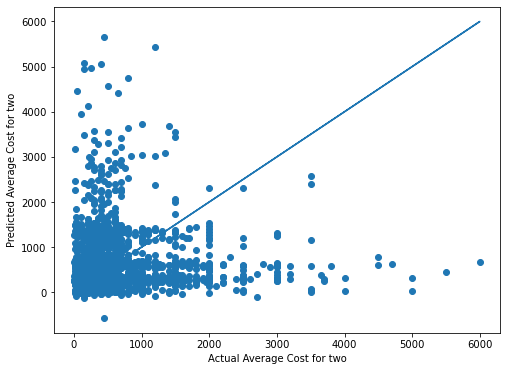

In [287]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()

# Documenting the Finding



    No null values present in dataset.
    Whose are having 1 as country code they are having more count.
    We can see, Price range of 1 has maximum price range followed by 2. All Price range are decreasing in order.
    We can see, Indian Rupees is most used currecny. It means that zomato has main business in India followed by Dollar. Remaining all has no such used, it means zomato not functioning in that country as zomato does in India.
    We can see, Zomato has not provivded the table booking. But in some place it provided table booking. May be their zomaato own its Restaurant.
    Most of places has no online delivery available. But in few places has availabled online delivery.
    we can see, India has 98.9% online delivery available but UAE has only 1.1% online delivery. But rest of all countries haven't online deliovery.
    We can see, orange is most used color for rating followed by white. Red color are less used for rating. It means no one dislike the food delivered by zomato.
    In rating text, Average is the most used test followed by good. But some of customer are not rated the zomato service. Very few customers gives poor rating.
    As we observed before that Indian currency is most used. It because of in India is the most of Zomato businees do followed by USA. Rest of all counteries zomato not gives service as in India they gives.
    68.7% zomato works in New Delhi foolowed by Gurgaon. In this we can observed here these cities are comes in Delhi NCR Region. It means that zomato mostly works in Delhi NCR region.
    We can see, 26.58% people or customers like to eat north Indian cuisine followed by Chinese.
    In which Connaught Place is top among the others it has 13.74% restaurant in it place followed by Rajouri Graden.
    We can see, Indonesia has high Average cost for two. It means that Indonesia has high cost of foos than others. Rest of all having low avwerage cost for two.
    In which Satoo hotel has high average cost for two followed by Skye.
    Yes,you can observe that median number of votes for both categories vary. Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.
    Many restaurant are having as price range 3 it means that those are also having high average price range. It may have directly proportional to each others.
    We can see, Many restaurant are having Excellent as rating text and their Aggrege=ate rating also high it mean more than 4.5. Similarly, Rating text is depending upon the aggregate rating. Whose are having good rating thier rating text also good.
    We can see, most of the place has no online delivery option. or online order system. But Malviya Nagar is top among the restaurant whose having online ordered or online delivery.
    We can see, those are not providing online delivery they also have less table booking but it doe not have any impact on business because most of the restaurant has not provided online delivery.
    Those restaurant not accepted online odered they also have good rating.
    we can see, Indonesia has high average cost for two and they also not available of online delivery. I means they are not having online oder system. rest of all are having low average cost foe two and they may not have any online system or may have online delivery.
    I observe there is no linear relation between price and rating. For instance, Restaurants with good rating (like 4–5) have restaurants with all the price range and spread across the entire X axis



# Model Save

In [288]:
import pickle
filename='Zomato_restaurant_project.pkl'
pickle.dump(gbr,open(filename,'wb'))

# Conclusion:

In [289]:
loaded_model=pickle.load(open('Zomato_restaurant_project.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

90.58379834805378


# Model Building For Predicting Price range (Classification)

In [290]:
df.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3749,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314
1,3173,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591
2,2897,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270
3,4707,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365
4,5523,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229


# Checking Multicollinearity

In [291]:
x = df.drop(columns=['Price range'],axis=1)
y = df['Price range']

In [292]:
from sklearn.preprocessing import StandardScaler

In [293]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
vif = pd.DataFrame()

In [296]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Restaurant Name,1.007192
1,City,1.073700
2,Address,1.098918
3,Locality,1.067978
4,Longitude,1.437166
5,Latitude,1.056308
6,Cuisines,1.040317
7,Average Cost for two,1.741096
8,Currency,1.171665
9,Has Table booking,1.596777




    If VIF > 10, It means multicollinearity is present.
    MultiCollinearity not exists Based on ANOVA F scores.



In [297]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [298]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [299]:
from sklearn.preprocessing import StandardScaler


In [300]:
# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.15320122, -0.40644576,  1.47370479, ..., -2.26885618,
        -0.20420612,  1.30223393],
       [-0.10300615, -0.40644576,  0.61835876, ..., -2.26885618,
        -0.20420612,  1.65627302],
       [-0.23099771, -0.310708  ,  0.13463254, ..., -1.38742706,
         1.51689551,  1.21890769],
       ...,
       [-0.15079956,  3.88657629,  0.58789144, ...,  1.32393817,
         0.39794913,  1.71976831],
       [-1.61804193,  3.88657629,  0.58823442, ..., -1.38742706,
         1.51689551,  1.8967675 ],
       [ 1.50177812,  3.88657629, -0.0228778 , ..., -1.38742706,
         1.51689551,  1.65627302]])

# Balancing the Data

In [301]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [302]:
smt_y.value_counts()

3    4437
4    4437
2    4437
1    4437
Name: Price range, dtype: int64

# LogisticRegression

In [303]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=641)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [304]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=641)

In [305]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6634741784037559

# Cross - validation for logistic Regression

In [306]:
from sklearn.model_selection import cross_val_score

In [307]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [308]:
cross = cross_val_score(lr,x,y,cv=4)
lsc = cross.mean()
print("At cv:-",4)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',accu*100)
print('\n')

At cv:- 4
Cross validation score is:- 78.21053169622158
accuracy_score is:- 66.34741784037558




In [309]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7821053169622157 
The accuracy score is:  0.6634741784037559


In [310]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))

# Random Forest Classifier

In [311]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=632)
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [312]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=632)

In [313]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 99.08%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1308
           2       0.99      0.99      0.99      1338
           3       0.98      0.99      0.99      1355
           4       0.99      0.99      0.99      1324

    accuracy                           0.99      5325
   macro avg       0.99      0.99      0.99      5325
weighted avg       0.99      0.99      0.99      5325


 Confusion Matrix: 
 [[1302    6    0    0]
 [   4 1321   13    0]
 [   0    5 1340   10]
 [   0    0   11 1313]]


# Cross - Validation for Random Forest classifier

In [314]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [315]:
cross = cross_val_score(rf,x,y,cv=6)
lsc = cross.mean()
print("At cv:-",6)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',accu*100)
print('\n')

At cv:- 6
Cross validation score is:- 90.95446158226429
accuracy_score is:- 99.07981220657277




# Gradient Boosting Classifier

In [316]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=592)
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [317]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 98.54%

==========================Test Result=======================
Accuracy Score: 98.07%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1304
           2       0.98      0.98      0.98      1367
           3       0.96      0.97      0.97      1303
           4       0.98      0.98      0.98      1351

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325


 Confusion Matrix: 
 [[1302    2    0    0]
 [   8 1339   18    2]
 [   0   21 1260   22]
 [   0    0   30 1321]]


# Cross - validation For GradientBoosting Classifier

In [318]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [319]:
cross = cross_val_score(gbc,x,y,cv=9)
lsc = cross.mean()
print("At cv:-",9)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',accu*100)
print('\n')

At cv:- 9
Cross validation score is:- 90.52927206745652
accuracy_score is:- 98.06572769953051




#  SVC

In [320]:
from sklearn.svm import SVC

In [321]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=521)
svc=SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [322]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 94.86%

==========================Test Result=======================
Accuracy Score: 93.56%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.95      0.97      1298
           2       0.92      0.92      0.92      1347
           3       0.90      0.91      0.90      1365
           4       0.94      0.96      0.95      1315

    accuracy                           0.94      5325
   macro avg       0.94      0.94      0.94      5325
weighted avg       0.94      0.94      0.94      5325


 Confusion Matrix: 
 [[1232   60    6    0]
 [  10 1242   87    8]
 [   1   49 1248   67]
 [   0    2   53 1260]]


# Cross - Validation for SVC

In [323]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [324]:
cross = cross_val_score(svc,x,y,cv=5)
lsc = cross.mean()
print("At cv:-",5)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',accu*100)
print('\n')

At cv:- 5
Cross validation score is:- 85.02634719199055
accuracy_score is:- 93.55868544600939




# KNN

In [325]:
from sklearn.neighbors import KNeighborsClassifier

In [326]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=950)
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [327]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 91.64%

==========================Test Result=======================
Accuracy Score: 87.38%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.89      0.82      0.86      1336
           2       0.77      0.78      0.78      1280
           3       0.88      0.90      0.89      1385
           4       0.95      0.99      0.97      1324

    accuracy                           0.87      5325
   macro avg       0.87      0.87      0.87      5325
weighted avg       0.87      0.87      0.87      5325


 Confusion Matrix: 
 [[1098  213   21    4]
 [ 129  996  142   13]
 [   2   78 1249   56]
 [   0    1   13 1310]]


# Cross - Validation for KNN

In [328]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [329]:
cross = cross_val_score(knn,x,y,cv=8)
lsc = cross.mean()
print("At cv:-",8)
print('Cross validation score is:-',lsc*100)
print('accuracy_score is:-',accu*100)
print('\n')

At cv:- 8
Cross validation score is:- 65.09677425241047
accuracy_score is:- 87.38028169014085




# Selecting Best Model

# Based on comparing Accuracy Score results with Cross Validation results, it is determined Gradient Boosting Classifier is the best model. It has least difference between accuracy score and cross validation.

# Hyperparameter Tuning

In [330]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [331]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=592)

In [332]:
param = {
    'max_depth': range(4,8),
    'min_samples_split': range(2,6,2),
    'learning_rate': np.arange(0.1,0.3),
    'n_estimators':[150,200],
    'min_samples_leaf':[2,3,4]
}

In [333]:
gbc=GradientBoostingClassifier()

In [334]:
rt = RandomizedSearchCV(gbc,param_distributions = param)

rt.fit(x_train,y_train)
rt.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'learning_rate': 0.1}

In [335]:
gbc=GradientBoostingClassifier(max_depth=7 , min_samples_split=4, min_samples_leaf=5, learning_rate=0.1, n_estimators=200)
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 99.21%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1304
           2       0.99      0.99      0.99      1367
           3       0.99      0.99      0.99      1303
           4       0.99      0.99      0.99      1351

    accuracy                           0.99      5325
   macro avg       0.99      0.99      0.99      5325
weighted avg       0.99      0.99      0.99      5325


 Confusion Matrix: 
 [[1303    1    0    0]
 [   4 1353   10    0]
 [   0   10 1285    8]
 [   0    0    9 1342]]


# ROC_AUC Curve

In [336]:
from sklearn.metrics import roc_curve, auc

In [337]:
#predicting the data
y_pred_cnb = gbc.predict(x_test)
y_prob_pred_cnb = gbc.predict_proba(x_test)

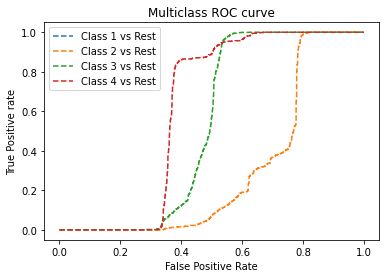

In [338]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', label='Class 4 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Save model

In [344]:
import joblib
joblib.dump(gbc,"Price_range_prediction.pkl")

['Price_range_prediction.pkl']

# Loading The Model

In [345]:
mod=joblib.load("Price_range_prediction.pkl")

# Predicting the Price range

In [346]:
print(mod.predict(x))

[3 3 4 ... 4 4 2]


In [347]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(10)

,Predictions,Actual Values
0,3,3
1,3,3
2,4,4
3,4,4
4,4,4
5,3,3
6,4,4
7,4,4
8,4,4
9,3,3
